# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import scipy.stats as st
from sklearn import datasets
import pandas as pd
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_data_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
merge_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_num = len(merge_data_df["Mouse ID"].unique())
mice_num

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = merge_data_df.loc[merge_data_df.duplicated(subset=["Mouse ID", "Timepoint"], 
                                                            keep=False), "Mouse ID"].unique()
duplicate_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merge_data_df.loc[merge_data_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = merge_data_df.loc[merge_data_df["Mouse ID"] != "g989", :]
clean_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
mice_num = len(clean_data_df["Mouse ID"].unique())
mice_num

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_df = clean_data_df.groupby("Drug Regimen")

mean_df = grouped_df["Tumor Volume (mm3)"].mean()
median_df = grouped_df["Tumor Volume (mm3)"].median()
var_df = grouped_df["Tumor Volume (mm3)"].var()
std_df = grouped_df["Tumor Volume (mm3)"].std()
sem_df = grouped_df["Tumor Volume (mm3)"].sem()

stats_df = pd.DataFrame({"Mean Tumor Volume": mean_df, 
                        "Median Tumor Volume": median_df,
                        "Tumor Volume Variance": var_df,
                        "Tumor Volume Std. Dev.": std_df,
                        "Tumor Volume Std. Err.": sem_df})

stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats2_df = grouped_df[["Tumor Volume (mm3)"]].aggregate(["mean", "median", "var", "std", "sem"])
stats2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

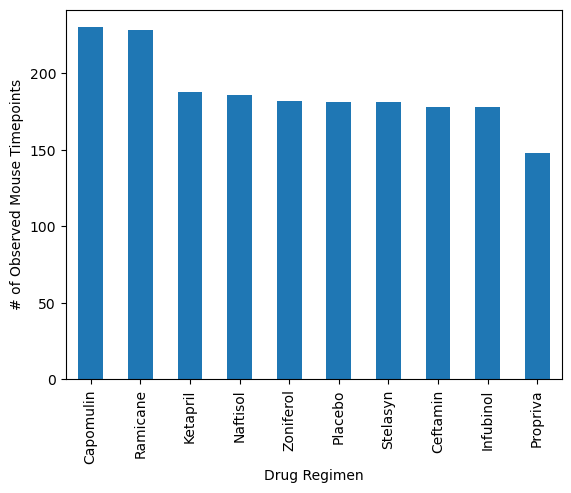

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
row_num = grouped_df["Timepoint"].count().sort_values(ascending=False)
row_num.plot(kind="bar")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


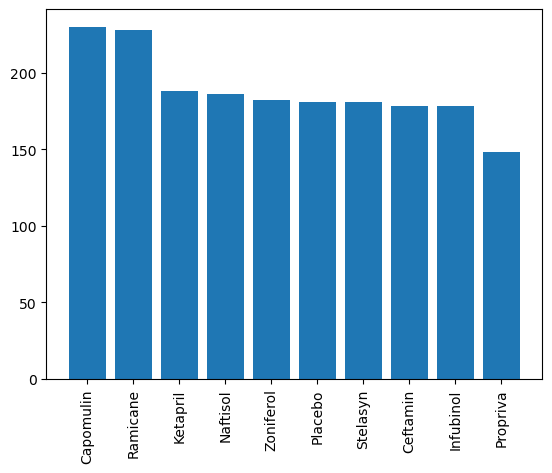

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(row_num.index, row_num)
plt.xticks(row_num.index, rotation= "vertical")
plt.show()


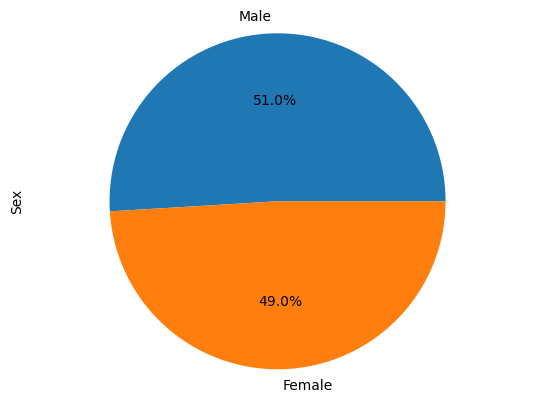

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = clean_data_df.groupby("Sex").count()["Mouse ID"].sort_values(ascending=False)
sex_df.plot(kind="pie", autopct="%1.1f%%", ylabel="Sex")
plt.axis("equal")
plt.show()

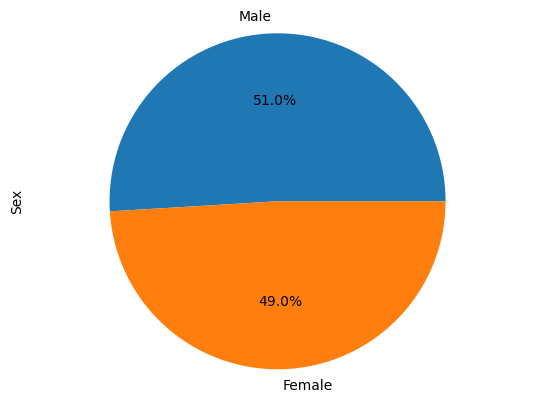

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_df, autopct="%1.1f%%", labels=sex_df.index)
plt.ylabel("Sex")
plt.axis("equal")
plt.show()



## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_per_mouse = clean_data_df.groupby("Mouse ID").max()["Timepoint"]
last_timepoint_per_mouse_df = pd.DataFrame(last_timepoint_per_mouse)
final_tumor_vol_df = pd.merge(last_timepoint_per_mouse, clean_data_df, on=("Mouse ID", "Timepoint"), how="left")
final_tumor_vol_df = final_tumor_vol_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)", "Weight (g)"]]
final_tumor_vol_df = final_tumor_vol_df.rename(columns={"Timepoint": "Final Timepoint", "Tumor Volume (mm3)": "Final Tumor Volume (mm3)"})
final_tumor_vol_df

,Mouse ID,Drug Regimen,Final Timepoint,Final Tumor Volume (mm3),Weight (g)
0,a203,Infubinol,45,67.973419,23
1,a251,Infubinol,45,65.525743,25
2,a262,Placebo,45,70.717621,29
3,a275,Ceftamin,45,62.999356,28
4,a366,Stelasyn,30,63.440686,29
...,...,...,...,...,...
243,z435,Propriva,10,48.710661,26
244,z578,Ramicane,45,30.638696,16
245,z581,Infubinol,45,62.754451,25
246,z795,Naftisol,45,65.741070,29


In [26]:
# DataFrame for Capomulin
capomulin_df = final_tumor_vol_df.loc[(final_tumor_vol_df["Drug Regimen"]=="Capomulin"), :]

# Find Final Tumor Volume (mm3) outliers for Capomulin
quartiles = capomulin_df["Final Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
median = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Tumor Volume (mm3) for Capomulin is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) for Capomulin is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) for Capomulin is: {iqr}")
print(f"The median value of Tumor Volume (mm3) for Capomulin is: {quartiles[0.5]} ")
print(f"Values of Tumor Volume (mm3) for Capomulin below {lower_bound} could be outliers.")
print(f"Values of Tumor Volume (mm3) for Capomulin above {upper_bound} could be outliers.")

capomulin_df.head(10)


The lower quartile of Tumor Volume (mm3) for Capomulin is: 32.37735684
The upper quartile of Tumor Volume (mm3) for Capomulin is: 40.1592203
The interquartile range of Tumor Volume (mm3) for Capomulin is: 7.781863460000004
The median value of Tumor Volume (mm3) for Capomulin is: 38.1251644 
Values of Tumor Volume (mm3) for Capomulin below 20.70456164999999 could be outliers.
Values of Tumor Volume (mm3) for Capomulin above 51.83201549 could be outliers.


,Mouse ID,Drug Regimen,Final Timepoint,Final Tumor Volume (mm3),Weight (g)
19,b128,Capomulin,45,38.982878,22
24,b742,Capomulin,45,38.939633,21
61,f966,Capomulin,20,30.485985,17
64,g288,Capomulin,45,37.074024,19
66,g316,Capomulin,45,40.159220,22
80,i557,Capomulin,45,47.685963,24
83,i738,Capomulin,45,37.311846,20
85,j119,Capomulin,45,38.125164,23
87,j246,Capomulin,35,38.753265,21
108,l509,Capomulin,45,41.483008,21


In [27]:
# Dataframe for Ramicane
ramicane_df = final_tumor_vol_df.loc[(final_tumor_vol_df["Drug Regimen"]=="Ramicane"), :]

# Find Final Tumor Volume (mm3) outliers for Ramicane
quartiles = ramicane_df["Final Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
median = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Tumor Volume (mm3) for Ramicane is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) for Ramicane is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) for Ramicane is: {iqr}")
print(f"The median value of Tumor Volume (mm3) for Ramicane is: {quartiles[0.5]} ")
print(f"Values of Tumor Volume (mm3) for Ramicane below {lower_bound} could be outliers.")
print(f"Values of Tumor Volume (mm3) for Ramicane above {upper_bound} could be outliers.")

ramicane_df.head(10)


The lower quartile of Tumor Volume (mm3) for Ramicane is: 31.56046955
The upper quartile of Tumor Volume (mm3) for Ramicane is: 40.65900627
The interquartile range of Tumor Volume (mm3) for Ramicane is: 9.098536719999998
The median value of Tumor Volume (mm3) for Ramicane is: 36.56165229 
Values of Tumor Volume (mm3) for Ramicane below 17.912664470000003 could be outliers.
Values of Tumor Volume (mm3) for Ramicane above 54.30681135 could be outliers.


,Mouse ID,Drug Regimen,Final Timepoint,Final Tumor Volume (mm3),Weight (g)
6,a411,Ramicane,45,38.407618,22
7,a444,Ramicane,45,43.047543,25
10,a520,Ramicane,45,38.810366,21
12,a644,Ramicane,45,32.978522,17
33,c458,Ramicane,30,38.342008,20
37,c758,Ramicane,45,33.397653,17
45,d251,Ramicane,45,37.311236,19
52,e662,Ramicane,45,40.659006,24
70,g791,Ramicane,45,29.128472,16
76,i177,Ramicane,45,33.562402,18


In [28]:
# Dataframe for Infubinol
infubinol_df = final_tumor_vol_df.loc[(final_tumor_vol_df["Drug Regimen"]=="Infubinol"), :]


# Find Final Tumor Volume (mm3) outliers for Infubinol
quartiles = infubinol_df["Final Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
median = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Tumor Volume (mm3) for Infubinol is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) for Infubinol is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) for Infubinol is: {iqr}")
print(f"The median value of Tumor Volume (mm3) for Infubinol is: {quartiles[0.5]} ")
print(f"Values of Tumor Volume (mm3) for Infubinol below {lower_bound} could be outliers.")
print(f"Values of Tumor Volume (mm3) for Infubinol above {upper_bound} could be outliers.")

infubinol_df.head(10)

The lower quartile of Tumor Volume (mm3) for Infubinol is: 54.04860769
The upper quartile of Tumor Volume (mm3) for Infubinol is: 65.52574285
The interquartile range of Tumor Volume (mm3) for Infubinol is: 11.477135160000003
The median value of Tumor Volume (mm3) for Infubinol is: 60.16518046 
Values of Tumor Volume (mm3) for Infubinol below 36.83290494999999 could be outliers.
Values of Tumor Volume (mm3) for Infubinol above 82.74144559000001 could be outliers.


,Mouse ID,Drug Regimen,Final Timepoint,Final Tumor Volume (mm3),Weight (g)
0,a203,Infubinol,45,67.973419,23
1,a251,Infubinol,45,65.525743,25
11,a577,Infubinol,30,57.031862,25
13,a685,Infubinol,45,66.083066,30
27,c139,Infubinol,45,72.226731,28
31,c326,Infubinol,5,36.321346,25
41,c895,Infubinol,30,60.969711,29
50,e476,Infubinol,45,62.435404,26
56,f345,Infubinol,45,60.918767,26
78,i386,Infubinol,40,67.289621,29


In [29]:
# Dataframe for Ceftamin
ceftamin_df = final_tumor_vol_df.loc[(final_tumor_vol_df["Drug Regimen"]=="Ceftamin"), :]

# Find Final Tumor Volume (mm3) outliers for Ceftamin
quartiles = ceftamin_df["Final Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
median = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Tumor Volume (mm3) for Ceftamin is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) for Ceftamin is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) for Ceftamin is: {iqr}")
print(f"The median value of Tumor Volume (mm3) for Ceftamin is: {quartiles[0.5]} ")
print(f"Values of Tumor Volume (mm3) for Ceftamin below {lower_bound} could be outliers.")
print(f"Values of Tumor Volume (mm3) for Ceftamin above {upper_bound} could be outliers.")

ceftamin_df.head(10)

The lower quartile of Tumor Volume (mm3) for Ceftamin is: 48.72207785
The upper quartile of Tumor Volume (mm3) for Ceftamin is: 64.29983003
The interquartile range of Tumor Volume (mm3) for Ceftamin is: 15.577752179999997
The median value of Tumor Volume (mm3) for Ceftamin is: 59.85195552 
Values of Tumor Volume (mm3) for Ceftamin below 25.355449580000002 could be outliers.
Values of Tumor Volume (mm3) for Ceftamin above 87.66645829999999 could be outliers.


,Mouse ID,Drug Regimen,Final Timepoint,Final Tumor Volume (mm3),Weight (g)
3,a275,Ceftamin,45,62.999356,28
21,b447,Ceftamin,0,45.000000,30
22,b487,Ceftamin,25,56.057749,28
25,b759,Ceftamin,30,55.742829,25
58,f436,Ceftamin,15,48.722078,25
75,h531,Ceftamin,5,47.784682,27
88,j296,Ceftamin,45,61.849023,30
94,k210,Ceftamin,45,68.923185,28
106,l471,Ceftamin,45,67.748662,28
107,l490,Ceftamin,30,57.918381,26


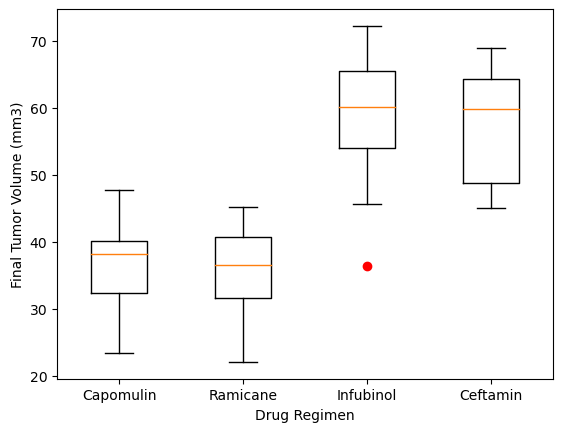

In [30]:
# Variables to store Final Tumor Volumes for each treatments
capomulin_tumor_vol = capomulin_df["Final Tumor Volume (mm3)"]
ramicane_tumor_vol = ramicane_df["Final Tumor Volume (mm3)"]
infubinol_tumor_vol = infubinol_df["Final Tumor Volume (mm3)"]
ceftamin_tumor_vol = ceftamin_df["Final Tumor Volume (mm3)"]

# Lists to store names and corresponding Final Tumor Volume for each treatments
treatments_list = [capomulin_tumor_vol, ramicane_tumor_vol, infubinol_tumor_vol, ceftamin_tumor_vol]
treatments_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Box plot that shows the distrubution of the tumor volume for each treatment group
fig, ax1 = plt.subplots()
ax1.boxplot(treatments_list, labels=treatments_names, sym="ro", )
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
plt.show()



## Line and Scatter Plots

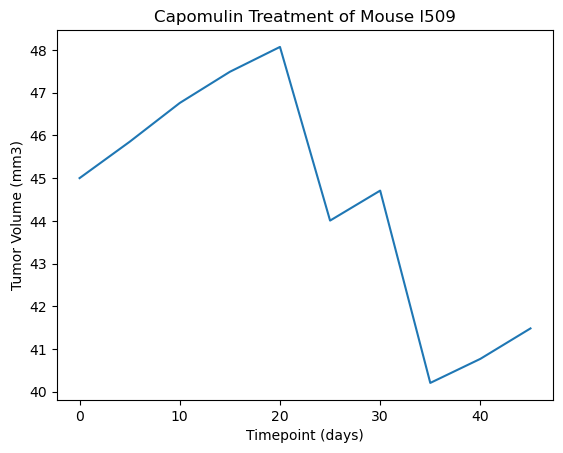

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509_df = clean_data_df.loc[clean_data_df["Mouse ID"]=="l509", :]
x_axis = mouse_l509_df["Timepoint"]
y_axis = mouse_l509_df["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

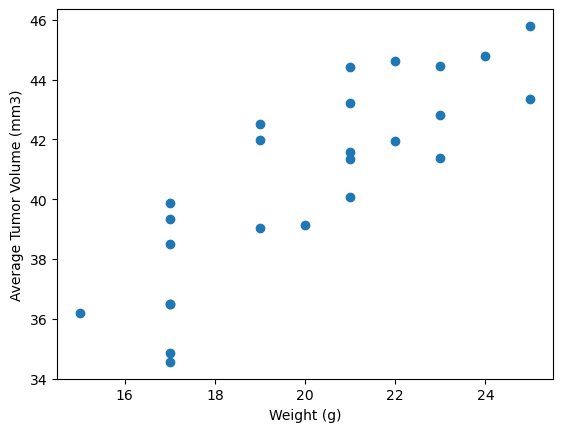

In [51]:
# To get the mouse weight for the entire Capomulin regimen
capomulin_weight_df = capomulin_df["Weight (g)"]

# To the average observed tumor volume for the entire Capomulin regimen
capomulin_avg_tumor_vol_df = clean_data_df.loc[(clean_data_df["Drug Regimen"]=="Capomulin"), ["Mouse ID","Tumor Volume (mm3)"]]
capomulin_avg_tumor_vol_df = capomulin_avg_tumor_vol_df.groupby("Mouse ID").mean()
capomulin_avg_tumor_vol_df = capomulin_avg_tumor_vol_df["Tumor Volume (mm3)"]

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen 
plt.scatter(capomulin_weight_df, capomulin_avg_tumor_vol_df)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


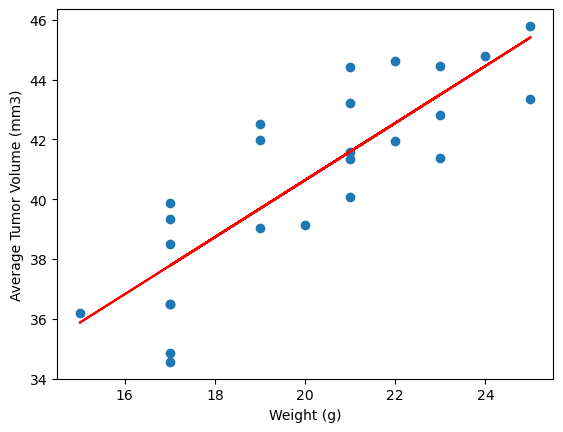

In [58]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Correlation coefficient and a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_weight_df, capomulin_avg_tumor_vol_df)

# Regression line equation
capomulin_regress_line = (slope*capomulin_weight_df) + intercept

# Print Correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")

# A scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen 
plt.scatter(capomulin_weight_df, capomulin_avg_tumor_vol_df)
plt.plot(capomulin_weight_df, capomulin_regress_line, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
